Starting with Kaggle competitions,
Lets import iris dataset


In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#to draw the plot 


In [2]:
dataset_path = "../dataset/Iris.csv"

# read the file
dataset = pd.read_csv(dataset_path)

# analyze the data and write down the markup about the data
print(dataset.describe())
print(dataset.head())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4   

Here goes my observation about the data:
<li> total 150 rows of data, quite less, but could be worked out 
<li> NO missing values, that's a good news 
<li> Id column is not required as it just identifies the row number (1 based indexing) 
<li> there are 4 numeric columns and 1 object column(which is the target) 
<li> Species column is string format, which need to be converted using some encoding 
as fit() does not process string, we will use get_dummies Here


In [3]:
# drop the Id
dataset.drop('Id', axis=1, inplace=True)
print(dataset.head(2))
# get all the features required
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = dataset[features]
# use get_dummies to encode Species column
#y = pd.get_dummies(dataset.Species)

#dataset.head()
print(dataset['Species'].unique())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### lets start the story telling

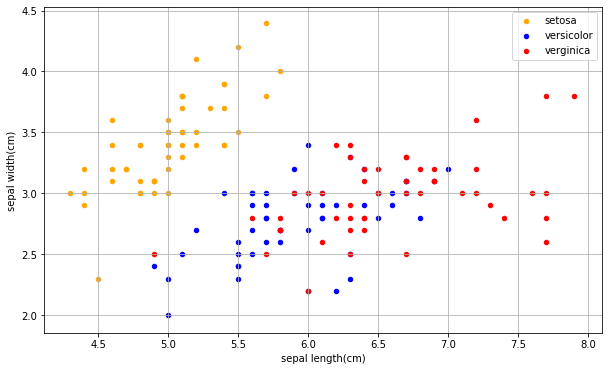

In [4]:
fig = dataset[dataset.Species=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange',label='setosa')
dataset[dataset.Species=='Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue',ax=fig, label='versicolor')
dataset[dataset.Species=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red',ax=fig, label='verginica')

fig.set_xlabel('sepal length(cm)')
fig.set_ylabel('sepal width(cm)')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.grid()
plt.show()

### lets see how data is distributed

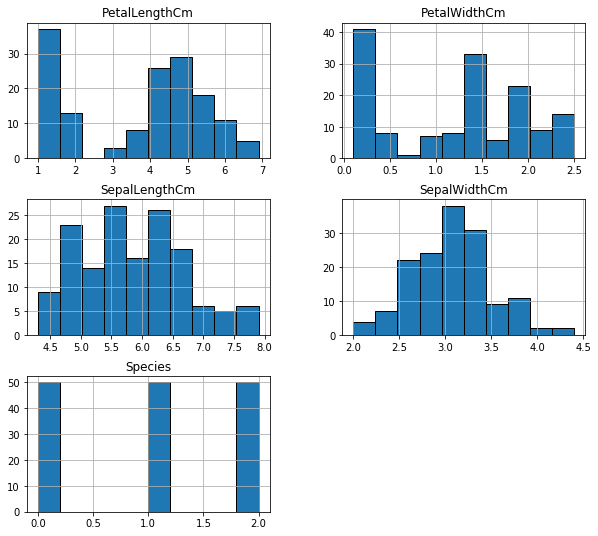

In [16]:
dataset.hist(edgecolor='black',linewidth=1)
fig = plt.gcf()
plt.grid()
fig.set_size_inches(10,9)
plt.show()

In [6]:
le = LabelEncoder()
dataset['Species'] = le.fit_transform(dataset.Species)
y = dataset['Species']

In [7]:
# divide the data into test and train
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)
print(train_y)

54     1
108    2
112    2
17     0
119    2
      ..
133    2
137    2
72     1
140    2
37     0
Name: Species, Length: 112, dtype: int64


<li> define the model, I am using decision tree, later on I will also use RandomForest and will compare the result

In [8]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
# fit the model
dt_model.fit(train_X, train_y)
# predict
dt_prediction = dt_model.predict(test_X)
#print(dt_prediction[:20])

NameError: name 'DecisionTreeClassifier' is not defined

<li> Now we predicted the values, its time to validate the model and check its accuracy
<li> We will accuracy_score

In [ ]:
# calculate mae
accuracy = accuracy_score(test_y, dt_prediction)
print(f"accuracy using DecisionTreeRegressor:{accuracy}")

In [ ]:
rf_model = RandomForestClassifier(random_state=1)
# fit the model
rf_model.fit(train_X, train_y)
# predict
rf_prediction = rf_model.predict(test_X)

# calculate accuracy
accuracy = accuracy_score(test_y, rf_prediction)
print(f"accuracy using RandomForestClassifier:{accuracy}")